In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# 맷플롯립을 가져온다.
import matplotlib as mpl

# 맷플롯립에서 pyplot라는 서브패키지(모듈)를 가져온다.
import matplotlib.pyplot as plt

# 넘파이를 가져온다. 
import numpy as np

# 맷플롯립에서 폰트매니저(글꼴 관리자)를 가져온다.
import matplotlib.font_manager as fm
# 폰트 파일 설치
!apt-get -qq -y install fonts-nanum > /dev/null
# [필요하다면] 설치된 폰트 파일의 파일 이름 확인
# fm._rebuild()
# sorted([f.name 
#        for f in fm.fontManager.ttflist 
#        if f.name.startswith("Nanum")])
# 글꼴 선택.
fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareRound.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

fm._rebuild()

# 맷플롯립에서 사용할 글꼴 지정
mpl.rc('font', family='NanumSquareRound') 

# 그래프 축에서 음수 부호를 쓸 수 있게 구성
mpl.rc('axes', unicode_minus=False)

# 파이플롯에서 사용할 글꼴만 지정하고 싶다면 위 문장 대신 아래 문장 사용
plt.rc('font', family='NanumSquareRound') 

fm._rebuild()

# 1. 성인

In [ ]:
# 성인 데이터 불러오기
%cd '/content/gdrive/MyDrive/class7/온반오반 팀/핵심역량프로젝트/성인 데이터'
!ls -al


post_adult_df = pd.read_csv('post_covid.csv')
pre_adult_df = pd.read_csv('pre_covid.csv')

/content/gdrive/.shortcut-targets-by-id/1N1s8vhguqw4WIGdcNXcBhWiF00DpHk-W/온반오반 팀/핵심역량프로젝트/성인 데이터
total 41469
-rw------- 1 root root   100079 Aug 11 04:34 '(최어진)Adult.ipynb'
-rw------- 1 root root 17417321 Aug  9 07:51  post_covid.csv
-rw------- 1 root root      143 Aug 11 01:10  post_covid.gsheet
-rw------- 1 root root 24944699 Aug  9 07:51  pre_covid.csv


In [ ]:
post_adult_df.columns

Index(['측정회차', '센터명', '나이구분', '측정구분', '측정나이', '입력구분', '상장구분', '측정일', '측정회원성별',
       '신장', '체중', '체지방율', '이완기혈압(최저)', '수축기혈압(최고)', '앉아윗몸앞으로굽히기(cm)', 'BMI',
       '교차윗몸일으키기(회)', '20m왕복오래달리기(회)', '왕복달리기(초)', '제자리멀리뛰기(cm)', '상대악력(%)',
       '트레드밀(출력)', '스텝검사(출력)', '반응시간(초)', '체공시간(초)'],
      dtype='object')

In [ ]:
adult_X_name = ['센터명', '측정나이', '측정회원성별', '측정일', '신장', '체중', '체지방율', '이완기혈압(최저)', '수축기혈압(최고)', 'BMI']
adult_Y_name = ['앉아윗몸앞으로굽히기(cm)', '20m왕복오래달리기(회)', '교차윗몸일으키기(회)', '제자리멀리뛰기(cm)', '상대악력(%)', '왕복달리기(초)', '상장구분']
# adult_Y_name = ['반복점프', '앉아윗몸앞으로굽히기(cm)', '일리노이민첩성', '왕복달리기(초)']

In [ ]:
adult_df = pd.concat([pre_adult_df, post_adult_df], axis=0)
adult_df.columns

333046


In [ ]:
adult_df2 = adult_df[adult_X_name + adult_Y_name]
adult_df2.columns

Index(['센터명', '측정나이', '측정회원성별', '측정일', '신장', '체중', '체지방율', '이완기혈압(최저)',
       '수축기혈압(최고)', 'BMI', '앉아윗몸앞으로굽히기(cm)', '20m왕복오래달리기(회)', '교차윗몸일으키기(회)',
       '제자리멀리뛰기(cm)', '상대악력(%)', '왕복달리기(초)', '상장구분'],
      dtype='object')

In [ ]:
adult_df3 = adult_df2.dropna()
print(adult_df3.shape)
adult_df3.isnull().sum()
adult_df3['맥압'] = adult_df3['수축기혈압(최고)'] - adult_df3['이완기혈압(최저)']
adult_df3.head()

(164054, 17)


,센터명,측정나이,측정회원성별,측정일,신장,체중,체지방율,이완기혈압(최저),수축기혈압(최고),BMI,앉아윗몸앞으로굽히기(cm),20m왕복오래달리기(회),교차윗몸일으키기(회),제자리멀리뛰기(cm),상대악력(%),왕복달리기(초),상장구분,맥압
0,강릉,56.0,F,20180102,151.6,50.16,37.8,67.0,105.0,21.8,3.6,12.0,14.0,126.0,40.6,15.02,참가증,38.0
1,안동,21.0,M,20180102,173.0,71.20,26.1,88.0,130.0,23.8,11.5,47.0,37.0,197.0,55.3,11.22,참가증,42.0
2,마포,60.0,F,20180102,149.3,60.80,38.4,72.0,127.0,27.3,10.1,8.0,5.0,108.0,40.2,15.92,참가증,55.0
4,마포,34.0,F,20180102,161.7,46.90,24.5,66.0,104.0,17.9,20.8,10.0,13.0,117.0,33.0,15.98,참가증,38.0
5,창원,56.0,F,20180102,148.0,65.50,47.8,64.0,98.0,29.9,4.0,1.0,1.0,50.0,25.4,19.66,참가증,34.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

adult_df3.describe()

,측정나이,측정일,신장,체중,체지방율,이완기혈압(최저),수축기혈압(최고),BMI,앉아윗몸앞으로굽히기(cm),20m왕복오래달리기(회),교차윗몸일으키기(회),제자리멀리뛰기(cm),상대악력(%),왕복달리기(초),맥압
count,164054.000000,1.640540e+05,164054.000000,164054.000000,164054.000000,164054.000000,164054.000000,164054.000000,164054.000000,164054.000000,164054.000000,164054.000000,164054.000000,164054.000000,164054.000000
mean,34.969662,2.018897e+07,167.166134,66.568300,25.593552,77.132174,125.713905,23.707095,12.313936,31.060459,33.987509,174.199173,52.969983,12.607677,48.581731
std,15.268699,8.169943e+03,9.047629,12.749979,8.393000,13.390226,43.565035,3.474332,9.582052,19.649609,16.209242,44.900433,58.965247,4.854963,43.576033
min,18.000000,2.018010e+07,50.600000,17.900000,1.400000,0.000000,0.000000,6.100000,-114.000000,-6.700000,0.000000,0.000000,-17823.500000,0.000000,-863.000000
25%,21.000000,2.018092e+07,160.100000,56.800000,19.500000,70.000000,116.000000,21.300000,6.800000,16.000000,22.000000,141.000000,44.300000,10.790000,41.000000
50%,28.000000,2.019053e+07,167.400000,65.400000,25.400000,77.000000,124.000000,23.400000,13.400000,26.000000,35.000000,175.000000,52.700000,12.200000,48.000000
75%,49.000000,2.019112e+07,174.000000,74.700000,31.600000,84.000000,134.000000,25.600000,19.000000,43.000000,46.000000,210.000000,61.700000,13.930000,55.000000
max,64.000000,2.022053e+07,204.000000,168.900000,387.600000,998.000000,15545.000000,197.600000,705.000000,137.000000,448.000000,2123.000000,754.100000,1260.000000,15471.000000


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

train_X = adult_df3.copy()

print(train_X.dtypes)
# print(train_X.shape)
# train_X.describe() 

# 이상치 제거
train_X = train_X[(train_X['체지방율'] >= 5) & (train_X['체지방율'] <= 50)]
print('체지방율 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['이완기혈압(최저)'] >= 50) & (train_X['이완기혈압(최저)'] <= 120)]
print('이완기혈압(최저) 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['수축기혈압(최고)'] >= 80) & (train_X['수축기혈압(최고)'] <= 180)]
print('수축기혈압(최고) 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['BMI'] >= 10) & (train_X['BMI'] <= 50)]
print('BMI 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['20m왕복오래달리기(회)'] >= 1) & (train_X['20m왕복오래달리기(회)'] <= 120)]
print('20m왕복오래달리기(회) 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['앉아윗몸앞으로굽히기(cm)'] >= -20) & (train_X['앉아윗몸앞으로굽히기(cm)'] <= 40)]
print('앉아윗몸앞으로굽히기(cm) 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['제자리멀리뛰기(cm)'] >= 40) & (train_X['제자리멀리뛰기(cm)'] <= 340)]
print('제자리멀리뛰기(cm) 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['교차윗몸윗몸말아올리기일으키기(회)'] >= 0) & (train_X['교차윗몸일으키기(회)'] <= 80)]
print('교차윗몸일으키기(회) 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['왕복달리기(초)'] >= 8) & (train_X['왕복달리기(초)'] <= 40)]
print('왕복달리기(초) 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['상대악력(%)'] >= 0) & (train_X['상대악력(%)'] <= 100)]
print('상대악력(%) 이상치제거 후: ', train_X.shape)

new_train_X = train_X.copy()
new_train_X.describe()

센터명                object
측정나이              float64
측정회원성별             object
측정일                 int64
신장                float64
체중                float64
체지방율              float64
이완기혈압(최저)         float64
수축기혈압(최고)         float64
BMI               float64
앉아윗몸앞으로굽히기(cm)    float64
20m왕복오래달리기(회)     float64
교차윗몸일으키기(회)       float64
제자리멀리뛰기(cm)       float64
상대악력(%)           float64
왕복달리기(초)          float64
상장구분               object
맥압                float64
dtype: object
체지방율 이상치제거 후:  (163689, 18)
이완기혈압(최저) 이상치제거 후:  (163099, 18)
수축기혈압(최고) 이상치제거 후:  (162993, 18)
BMI 이상치제거 후:  (162983, 18)
20m왕복오래달리기(회) 이상치제거 후:  (162413, 18)
앉아윗몸앞으로굽히기(cm) 이상치제거 후:  (162362, 18)
제자리멀리뛰기(cm) 이상치제거 후:  (162276, 18)
교차윗몸일으키기(회) 이상치제거 후:  (162257, 18)
왕복달리기(초) 이상치제거 후:  (162214, 18)
상대악력(%) 이상치제거 후:  (162160, 18)


,측정나이,측정일,신장,체중,체지방율,이완기혈압(최저),수축기혈압(최고),BMI,앉아윗몸앞으로굽히기(cm),20m왕복오래달리기(회),교차윗몸일으키기(회),제자리멀리뛰기(cm),상대악력(%),왕복달리기(초),맥압
count,162160.000000,1.621600e+05,162160.000000,162160.000000,162160.000000,162160.000000,162160.000000,162160.000000,162160.000000,162160.000000,162160.000000,162160.000000,162160.000000,162160.000000,162160.000000
mean,34.959139,2.018897e+07,167.185047,66.549755,25.565086,77.131769,125.606392,23.689566,12.324697,31.163726,34.030641,174.590900,53.144450,12.600247,48.474624
std,15.258127,8.170712e+03,9.013257,12.711715,8.163682,9.828864,13.694614,3.356821,9.344395,19.535553,16.058903,43.801225,12.286634,2.398711,10.625653
min,18.000000,2.018010e+07,127.400000,26.900000,5.000000,50.000000,80.000000,11.400000,-20.000000,1.000000,0.000000,40.000000,0.000000,8.000000,-14.000000
25%,21.000000,2.018092e+07,160.100000,56.740000,19.500000,70.000000,117.000000,21.300000,6.800000,16.000000,22.000000,141.000000,44.400000,10.800000,41.000000
50%,28.000000,2.019053e+07,167.400000,65.400000,25.400000,77.000000,124.000000,23.400000,13.400000,26.000000,35.000000,175.000000,52.700000,12.200000,48.000000
75%,49.000000,2.019112e+07,174.000000,74.700000,31.600000,84.000000,134.000000,25.600000,19.000000,43.000000,46.000000,210.000000,61.600000,13.920000,55.000000
max,64.000000,2.022053e+07,204.000000,157.700000,50.000000,120.000000,180.000000,47.800000,40.000000,120.000000,80.000000,310.000000,100.000000,38.000000,108.000000


# 여기서 새로 시작!!

In [ ]:
# adult_df3_columns_list = ['센터명', '측정나이', '측정회원성별', '측정일', '신장', '체중', '체지방율', '이완기혈압(최저)',
#        '수축기혈압(최고)', 'BMI', '앉아윗몸앞으로굽히기(cm)', '20m왕복오래달리기(회)', '교차윗몸일으키기(회)', '제자리멀리뛰기(cm)',
#        '상대악력(%)', '왕복달리기(초)', '상장구분']
train_X = new_train_X.copy()
choose_list = ['체지방율', '20m왕복오래달리기(회)', '교차윗몸일으키기(회)', '제자리멀리뛰기(cm)',
       '상대악력(%)', '왕복달리기(초)', '상장구분']
train_X = train_X[choose_list]
train_y = train_X[['상장구분']]
train_X.drop(columns=['상장구분'], axis=1, inplace=True)
print(train_X.shape)
print(train_y.shape)

(162160, 6)
(162160, 1)


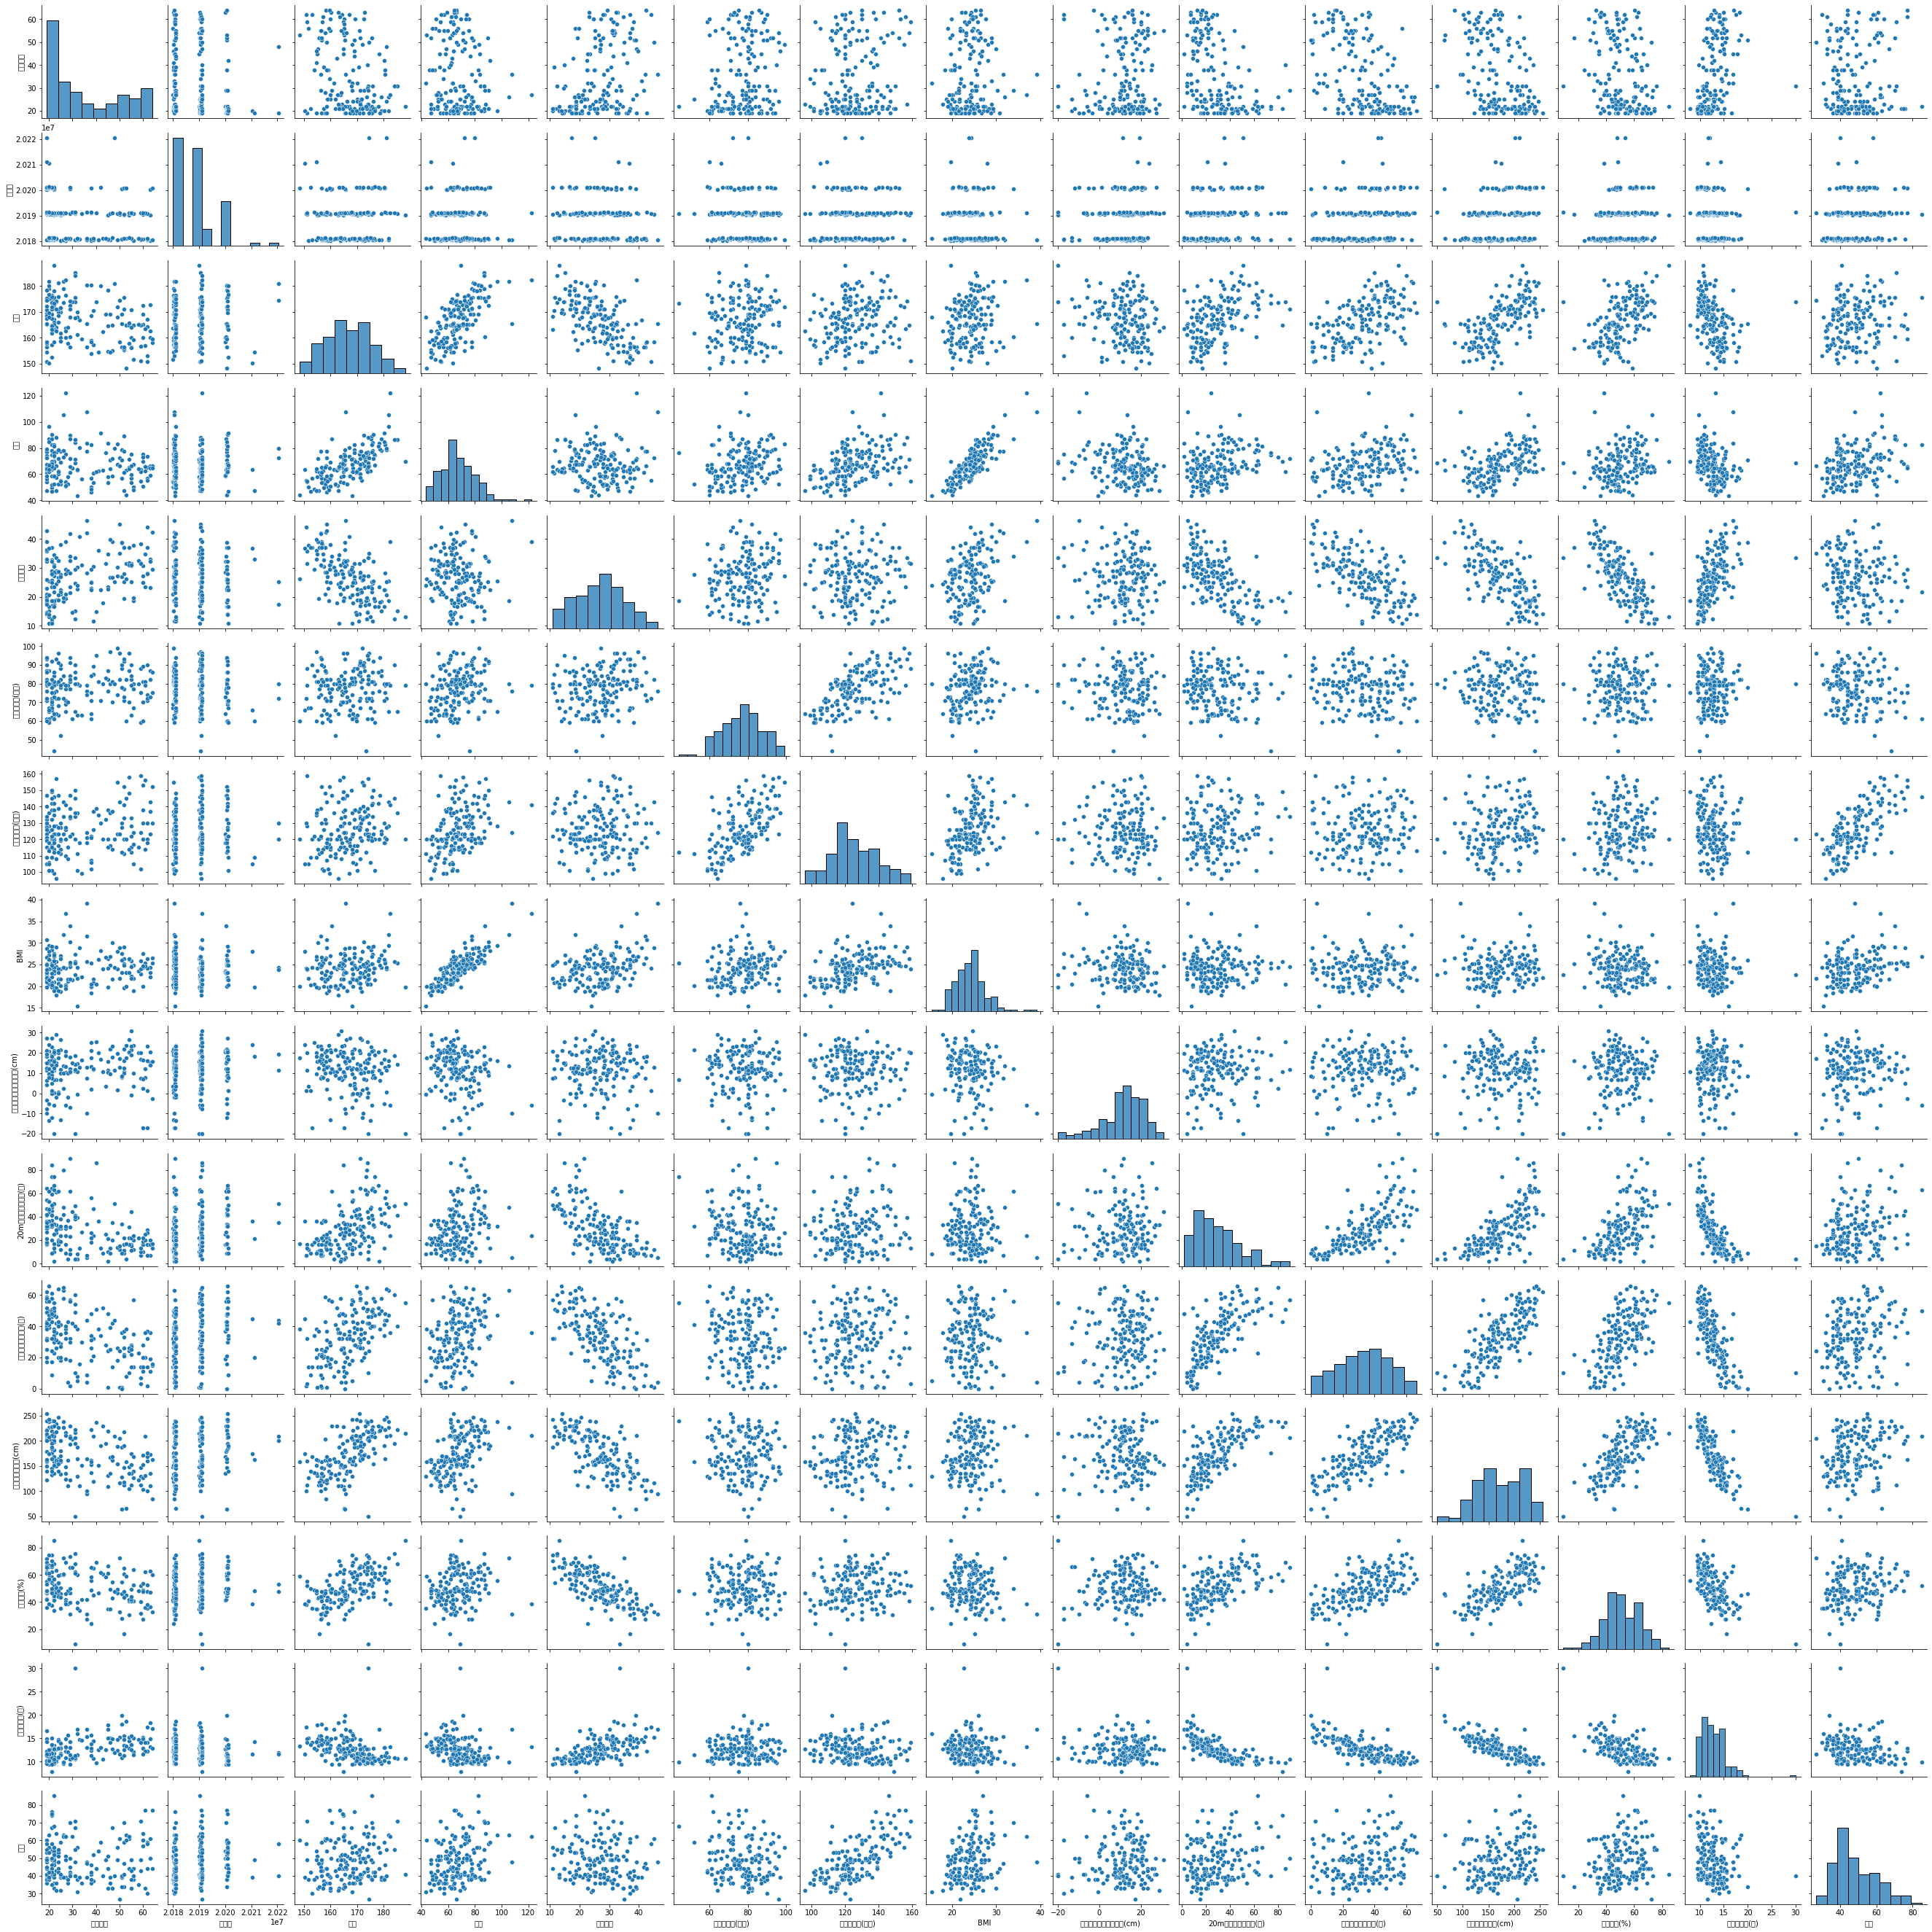

In [ ]:
sns.pairplot(data=adult_df3[::1000])
plt.show()

In [ ]:
# # test1: train_X(non scaled)에 대해 k를 구하기 위한 테스트, inertia와 silhouette_score 사용하기
# from sklearn.cluster import KMeans

# inertia_list = []
# n_cluster_list = []
# silhouette_list = []
# for i in range(1,11):
#     km = KMeans(n_clusters=i)
#     km.fit(train_X)
#     inertia_list.append(km.inertia_)
#     n_cluster_list.append(i)
#     # silhouette_list.append(silhouette_score(train_X, km.labels_))


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.plot(n_cluster_list, inertia_list)

In [ ]:
# test2: scaled_train_X에 대하여 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

mms = MinMaxScaler()
scaled_train_X = pd.DataFrame(mms.fit_transform(train_X), index=train_X.index, columns=train_X.columns)
scaled_train_X.head()
# ss = StandardScaler()
# scaled_train_X = pd.DataFrame(ss.fit_transform(train_X), index=train_X.index, columns=train_X.columns)
# scaled_train_X.head()

inertia_list = []
n_cluster_list = []
silhouette_list = []
model_list = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(scaled_train_X)
    inertia_list.append(km.inertia_)
    n_cluster_list.append(i)
    # model_list.append(km)
    # silhouette_list.append(silhouette_score(scaled_train_X, km.labels_))

[23993.569205938595, 11469.64593487345, 8582.759576588305, 7452.32364673713, 6827.055966279855, 6285.0708410225025, 5886.552990601962, 5565.893249730989, 5326.159369846306, 5142.007172212398]


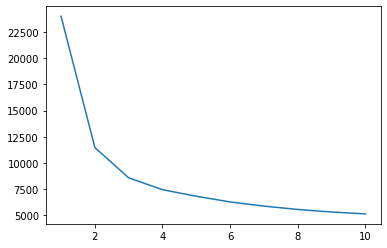

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(n_cluster_list, inertia_list)
print(inertia_list) # k = 4가 적당해 보임.

In [ ]:
km = KMeans(n_clusters=4)
km.fit(scaled_train_X)
# silhouette_score(scaled_train_X, km.labels_)

KMeans(n_clusters=4)

In [ ]:
result_df = train_X.copy()
result_df['cluster'] = pd.DataFrame(km.labels_, index=scaled_train_X.index, columns=['cluster'])
result_df['상장구분'] = train_y
result_df.groupby('cluster').mean()
result_df.groupby('cluster').count()

,체지방율,20m왕복오래달리기(회),교차윗몸일으키기(회),제자리멀리뛰기(cm),상대악력(%),왕복달리기(초),상장구분
cluster,,,,,,,
0,49141,49141,49141,49141,49141,49141,49141
1,32768,32768,32768,32768,32768,32768,32768
2,46771,46771,46771,46771,46771,46771,46771
3,33480,33480,33480,33480,33480,33480,33480


In [ ]:
# 가시화를 위한 차원 축소
from sklearn.decomposition import PCA
X = scaled_train_X.copy()

#객체
pca = PCA(n_components=2)

#적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca
pca_df = pd.DataFrame(x_pca, index=scaled_train_X.index)
pca_df['cluster'] = result_df['cluster']
pca_df.head()

,0,1,cluster
0,-0.460141,-0.048706,3
1,0.122729,-0.056122,2
2,-0.577726,0.016871,3
4,-0.381172,0.156897,3
5,-0.887487,-0.119927,3


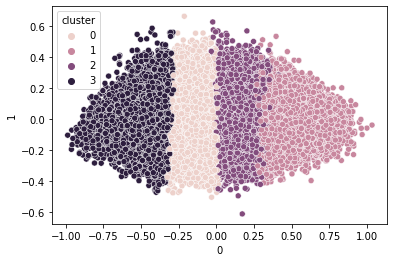

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(0, 1, hue='cluster', data=pca_df)